**Créditos**: baseado nun código visto en: https://medium.com/@a.fernandez.troyano/nube-de-palabras-word-cloud-con-python-a-partir-de-varias-webs-111e94220822

Repo orixinal: https://github.com/bigdatawirtz/nubes/blob/main/nube_de_respostas.ipynb

# Facendo unha nube de palabras

## Instalando dependencias

- conda activate bigdata

- conda install numpy pandas

- conda install -c conda-forge wordcloud nltk

## Cargamos librarías

In [5]:
#Librerías básicas
import numpy as np
import pandas as pd

#Librerías para imaxes, nubes de palabras e plot
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

#Librarías para limpieza de datos
import string
import nltk
from nltk.corpus import stopwords

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diego.guizanlopez\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

**Carga de texto**

In [79]:
texto=""
# Leemos de un fichero.txt los parrafos de forma bruta que luego serán limpiados
with open('defino.txt', 'r') as fichero:
    linea = fichero.readline()
    while linea != '':
        linea = fichero.readline()
        texto += linea

In [1]:
import urllib3

def get_request(uri):
    """
    Realiza una llamada http del enlace y devuelve el request de esa llamada
    :param str uri: Enlace a cual queremos llamar
    """
    ua = "Mozilla/5.0 (Linux; U; Android 2.2; en-us; Nexus One Build/FRF91) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1"  
    h = {"User-Agent": ua}
    httpPool = urllib3.PoolManager()
    request = httpPool.request('GET', uri,fields=None, headers=h)
    return request

In [3]:

from bs4 import BeautifulSoup

# Realizamos una llamada a una noticia del diario espanol y recogemos solo los parrafos de ese
soup = BeautifulSoup(get_request("https://espanol.almayadeen.net/noticias/politica/1780850/-israel--desmoviliza-reservistas-sin-anuncio-oficial").data, 'html.parser')
texto=" ".join(list(map(lambda x: x.text,soup.find_all('p'))))



In [16]:
from bs4 import BeautifulSoup
import urllib3
import json

# Llamamos al JSON de enlaces y recogemos solo los enlaces, los cuales utilizamos para recoger los titulares de esos diarios
with open("URL.json","r") as f:
    urls = json.load(f)

URLS = list(map(lambda x: x['URL'],urls['periodicos']))
texto=""
for url in URLS:

    soup = BeautifulSoup(get_request(url).data, 'html.parser')
    
    texto+=" ".join(list(map(lambda x: x.text,soup.find_all(['h1','h2','h3','h4','h5','h6']))))


In [17]:
texto

'\nLa Fiscalía pide hasta 27 años de prisión para doce CDR acusados por terrorismo que pueden beneficiarse de la amnistía\n \nEl PNV prescinde de Urkullu y no será candidato a las elecciones vascas del 2024\n \nLa mujer hallada sin vida en O Porriño es una vecina de Vigo a la que sus amigos llevaban días sin ver\n \nSánchez abre la puerta a que España reconozca de forma unilateral al Estado palestino\n \nMuere un vecino de Dumbría por la picadura de una velutina\n \nVigo enciende esta tarde la Navidad en el planeta\n \nYasmín, la lucense expulsada del Pazo por sacar una bandera palestina: «Estoy contenta por visibilizar una causa justa»\n \nLa científica Marisol Soengas, galardonada en la 65.ª edición del premio Fernández Latorre\n \nHallan la cabeza del vecino de Mazaricos cuya desaparición se vincula al delincuente Pandolo\n \nEn pleno «Black Friday», la red de pagos volvió a dejar colgados a clientes y comercios\n \nUn perro de caza ataca en Valga a una mujer con un bebé y a un volu

**Limpeza do texto**

In [18]:
#Generación de lista de signos de puntuación


#Expresión regular para destruir todos los sígnos de puntuación
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
texto=' '.join(tokenizer.tokenize(texto))


punctuation=[]
for s in string.punctuation:
    punctuation.append(str(s))
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

punctuation += sp_punctuation

print(punctuation[:10]) #Ejemplo de los símbolos de puntuación que están incluidos

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*']


In [19]:
#Listado de palabras que queremos eliminar del texto
#Es un proceso iterativo por lo que si después vemos que nos siguen quedado "caractéres raros" simplemente venímos aquí y los agregamos
#Existe librerías y listados de "Stop_words", pero por ahora vamos a dejarlo vacío

#nltk.download('stopwords') #La primera vez debemos descargar las "stopwords"

stop_words = stopwords.words('spanish') #Listado de palabras a eliminar

stop_words += ["\u200b", "\xa0", "para", "como", "puede","cómo", "hacer", "forma", "parte", "hace", "además", "según", "pueden", "ser"] #Añadimos algunos caractéres que hemos encontrado

stop_words[:10]


['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']

In [20]:
#Reemplazamos signos de puntuación por "":
for sw in stop_words:
    clean_texto = texto.lower().replace(sw,"")
    
for p in punctuation:
    clean_texto = clean_texto.replace(p,"")


#Eliminamos espacios blancos, saltos de línea, tabuladores, etc    
#clean_texto = " ".join(clean_texto.split())    

#Reemplazamos stop_words por "":    
for stop in stop_words:
    clean_texto_list = clean_texto.split()
    clean_texto_list = [i.strip() for i in clean_texto_list]
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    clean_texto= " ".join(clean_texto_list)


In [21]:
lista_texto = clean_texto.split(" ")

palabras = []

#Paso intermedio para eliminar palabras muy cortas (emoticonos,etc) y muy largas (ulr o similar) que se nos hayan pasado:

for palabra in lista_texto:
    if (len(palabra)>=3 and len(palabra)<18):
        palabras.append(palabra)

**Contaxe de palabras**

In [22]:
#Generamos un diccionario para contabilizar las palabras:

word_count={}

for palabra in palabras:
    if palabra in word_count.keys():
        word_count[palabra][0]+=1
    else:
        word_count[palabra]=[1]

In [23]:
#Generamos el DF y lo ordenamos:

df = pd.DataFrame.from_dict(word_count).transpose()
df.columns=["freq"]
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

,freq
españa,28
tras,20
mejor,19
black,17
sánchez,17
años,16
friday,16
gran,14
amnistía,13
así,12


**Mostrar gráfica de ocorrencias das palabras**

In [24]:
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

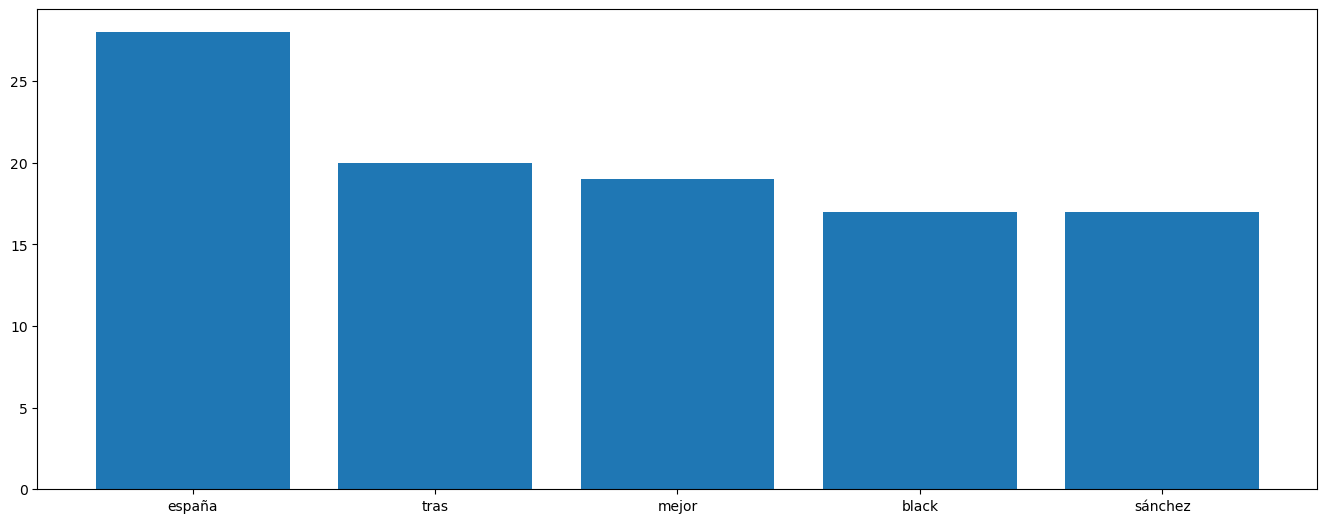

In [25]:
#Graficamos el TOP 5 palabras por frecuencia

plot_bar(data=df, top=5)

**Crear nube de palabras**

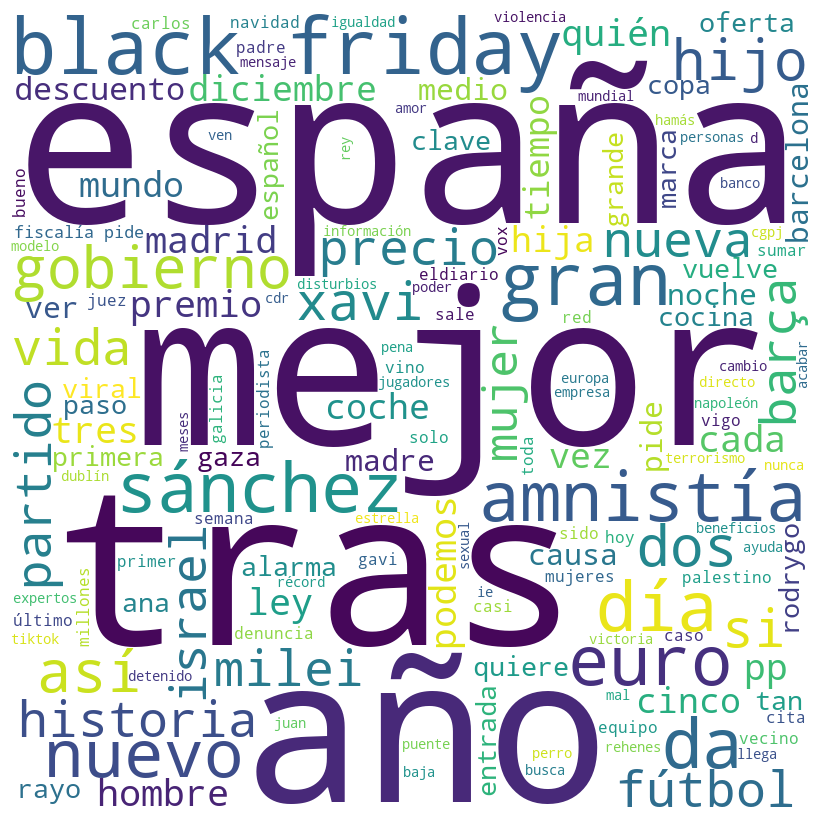

In [26]:
#word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5).generate(clean_texto)

#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada
#word_cloud.to_file("./img/ejemplo_sencillo.png") #Guardamos la imagen generada

plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()